In this kernel we will cover how to explore a data set using statistics and vizualization.This kernel is a work in process.I will be updating the kernel in coming days.If you like my work please do vote.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/wine-quality/winequalityN.csv
/kaggle/input/box-plot-1/BOX_PLOT.PNG


**Importing Python Modules**

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import warnings
import seaborn as sns
warnings.filterwarnings('ignore') 

In [3]:
df=pd.read_csv('../input/wine-quality/winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Summary of Dataset**

In [4]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 6497
Columns  : 13

Features :
     : ['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

Missing values    : 38

Unique values :  
 type                      2
fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
dtype: int64


In [5]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

**Finding out which columns are catogerical**

In [6]:
df.select_dtypes(exclude=['int','float']).columns

Index(['type'], dtype='object')

Only the column type is of catogerical type

In [7]:
print(df['type'].unique())

['white' 'red']


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


**Describe Data**

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


We can see that the mean Alcohol content is 10.49 % .

Average Quality of the win is 5.81

**Histograms**

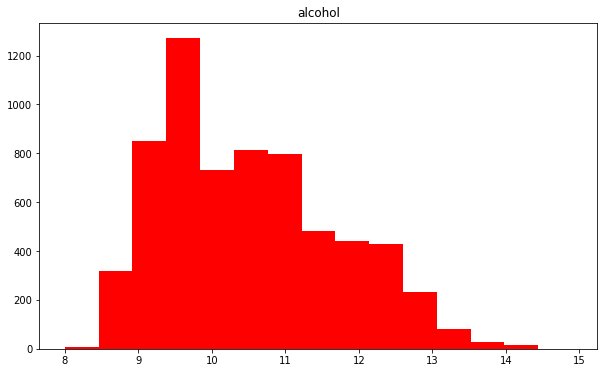

In [10]:
df.hist(column='alcohol',bins=15,grid=False,figsize=(10,6),color='r')
plt.ioff()

**Histogram with Seaborn**

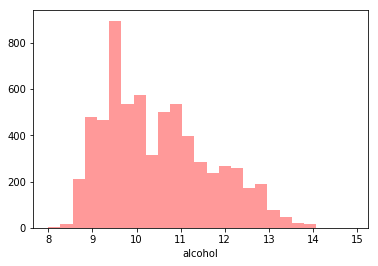

In [11]:
sns.distplot(df['alcohol'],bins=25,kde=False,color='r')
plt.ioff()

**KDE Histogram**

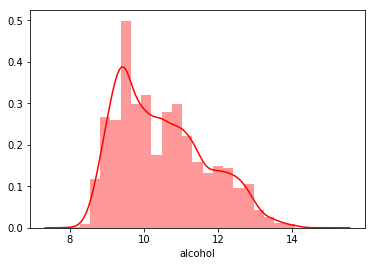

In [12]:
sns.distplot(df['alcohol'],bins=25,kde=True,color='r')
plt.ioff()

In [13]:
df['alcohol'].value_counts().head()

9.5     367
9.4     332
9.2     271
10.0    229
10.5    227
Name: alcohol, dtype: int64

Top five alcohol content perentage is 9.5,9.4,9.2,10,10.5

**Styling and Axis Labels**

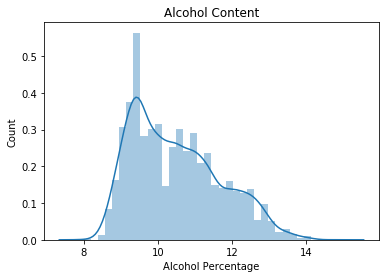

In [14]:
import matplotlib.pyplot as plt
sns.distplot(df.alcohol)
plt.xlabel('Alcohol Percentage')
plt.ylabel('Count')
plt.title('Alcohol Content')
plt.ioff()

**Use Seaborn Style**

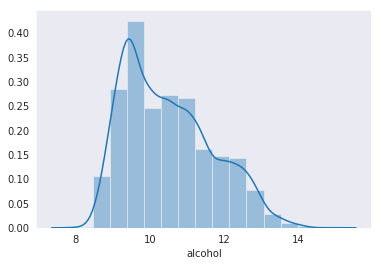

In [15]:
sns.set_style('dark')
sns.distplot(df.alcohol,bins=15)
plt.ioff()

**All Histograms Together**

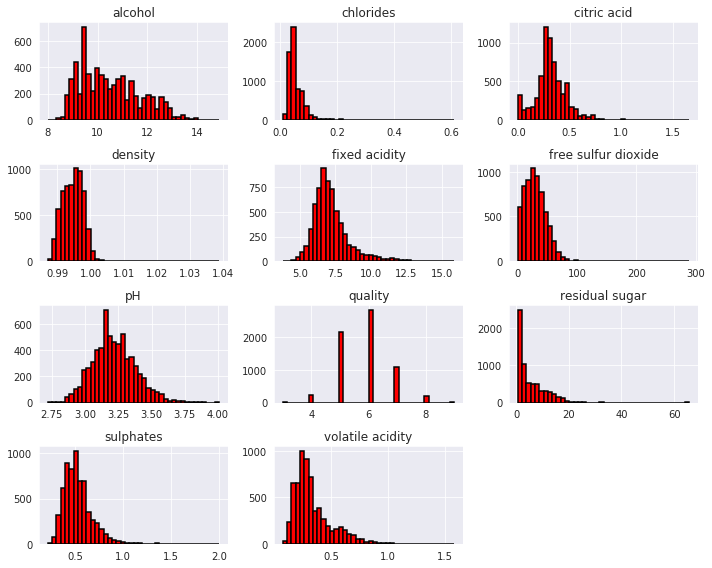

In [16]:
df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','density','pH','sulphates','alcohol','quality']].hist(figsize=(10,8),bins=40,color='r',linewidth='1.5',edgecolor='k')
plt.tight_layout()
plt.show()

**Scatter plot**

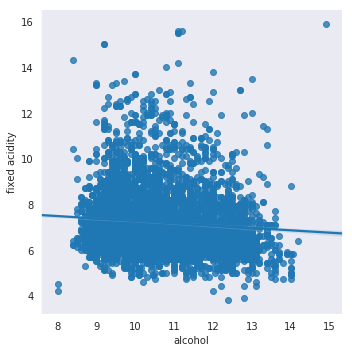

In [17]:
sns.lmplot(x='alcohol',y='fixed acidity',data=df)
plt.ioff()

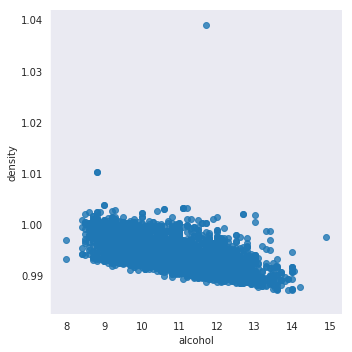

In [18]:
sns.lmplot(x='alcohol',y='density',data=df,fit_reg=False)
plt.ioff()

**Segregation using HUE**

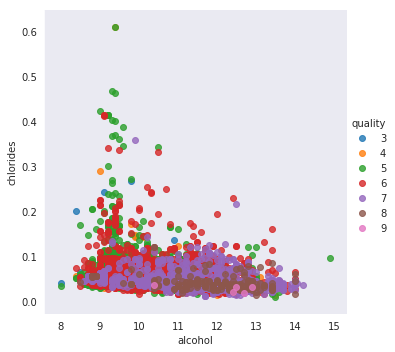

In [19]:
sns.lmplot(x='alcohol',y='chlorides',data=df,fit_reg=False,hue='quality')
plt.ioff()

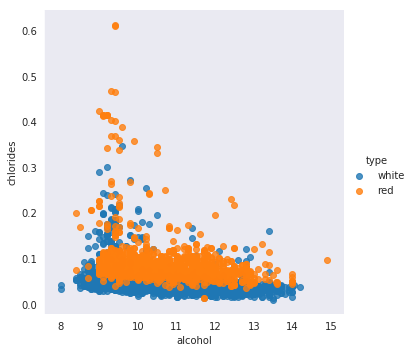

In [20]:
sns.lmplot(x='alcohol',y='chlorides',data=df,fit_reg=False,hue='type')
plt.ioff()

**Understanding Percentile** 

In [21]:
print(df['alcohol'].quantile(0.1))
print(df['alcohol'].quantile(0.5))
print(df['alcohol'].quantile(0.9))
print(df['alcohol'].quantile(0.99))

9.1
10.3
12.3
13.4


10 % Wine has 9.1 % Alcohol 

10.3 % Wine has 10.3 % Alcohol 

12.3% Wine has 12.3 % Alcohol

13.4% Wine has 13.4 % Alcohol

**What is maximum Value of alcohol?**

In [22]:
df['alcohol'].max()

14.9

In [23]:
df['alcohol'].quantile(([0.05,0.95]))

0.05     9.0
0.95    12.7
Name: alcohol, dtype: float64

**Box Plots and outliers**

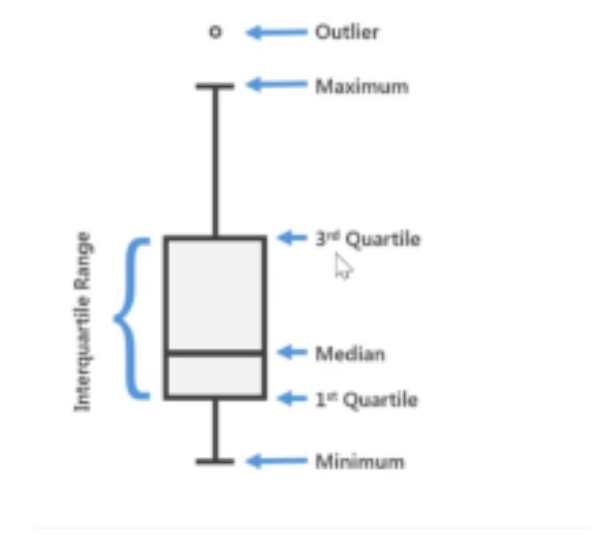

In [24]:
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import numpy as np
img=np.array(Image.open('../input/box-plot-1/BOX_PLOT.PNG'))
fig=plt.figure(figsize=(10,10))
plt.imshow(img,interpolation='bilinear')
plt.axis('off')
plt.show()

maximum:Q3 + 1.5 * IQR
minimum:Q1-1.5 * IQR

0.25     9.5
0.75    11.3
Name: alcohol, dtype: float64


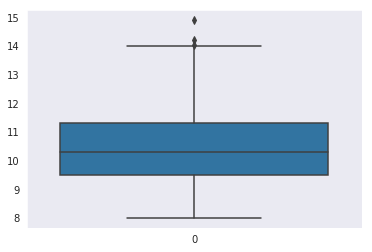

In [25]:
print(df['alcohol'].quantile(([0.25,0.75])))
sns.boxplot(data=df['alcohol'])
plt.ioff()

**Box plot of all Features**

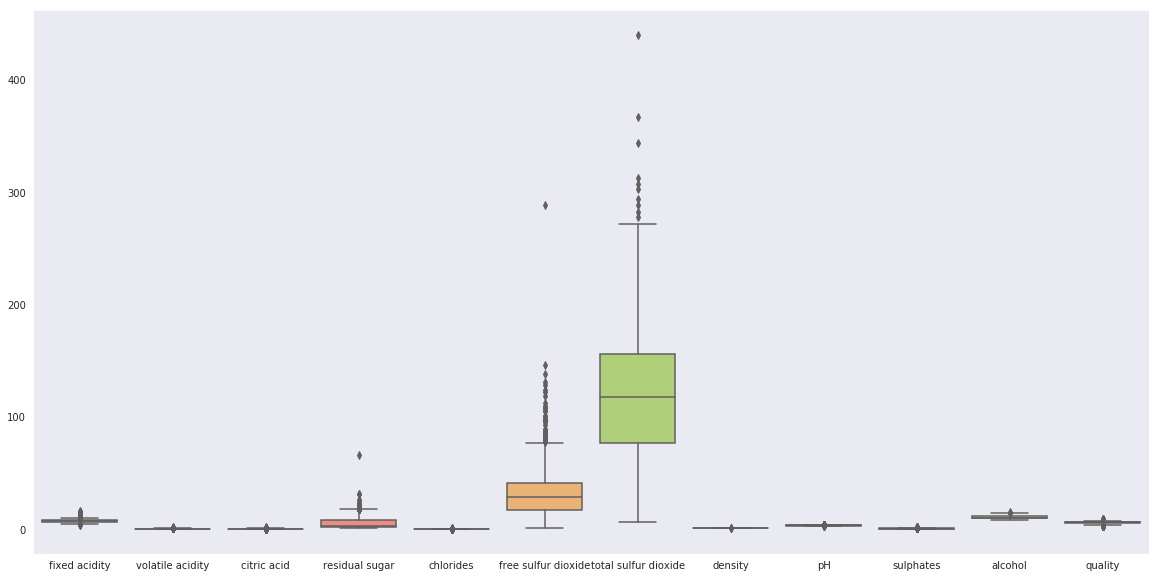

In [26]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,palette='Set3')
plt.ioff()

**Violin Plots**

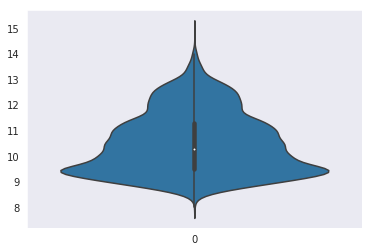

In [27]:
sns.violinplot(data=df['alcohol'])
plt.ioff()

**Bar Plot**

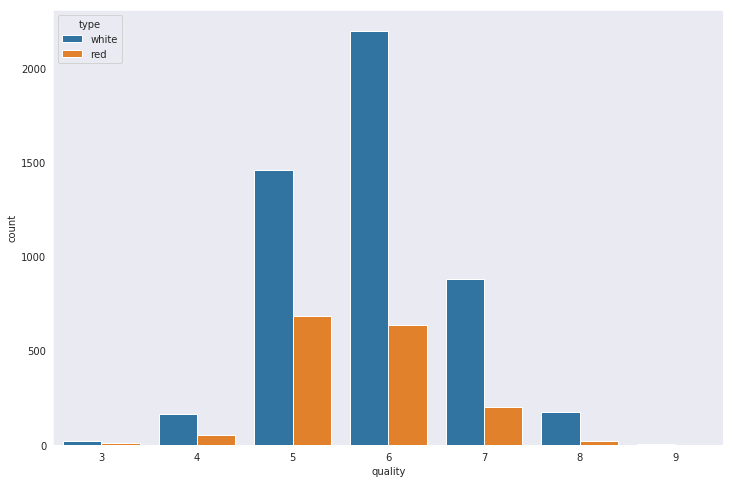

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(x='quality',data=df,hue='type')
plt.ioff()

**Density Plot**

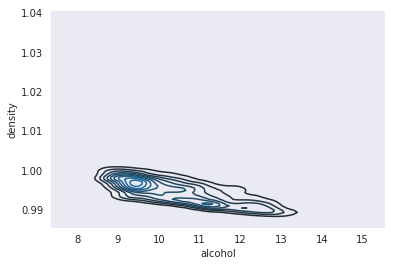

In [29]:
sns.kdeplot(df.alcohol,df.density)
plt.ioff()

**Joint Distribution plot**

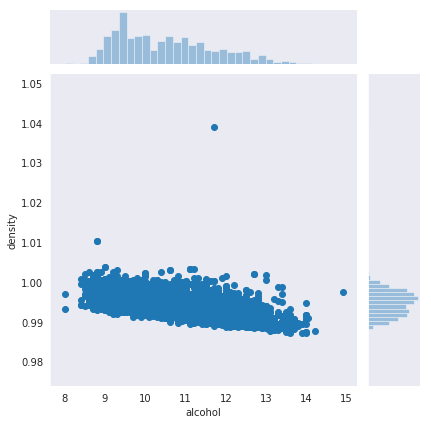

In [30]:
sns.jointplot(x='alcohol',y='density',data=df)
plt.ioff()

**Factor Plots and Bee Swarm Plots**

In [31]:
#g=sns.factorplot(x='free sulfur dioxide',y='alcohol',data=df,col='quality',hue='quality',kind='point')
#g.set_xticklabels(rotation=-45)
#plt.ioff()

**Emprical Cumulative Distribution function (ECDF)**

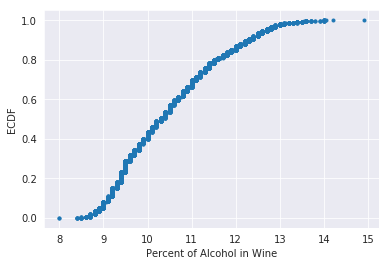

In [32]:
import numpy
x=np.sort(df['alcohol'])
y=np.arange(1,len(x)+1)/len(x)
plt.plot(x,y,marker='.',linestyle='none')
plt.margins(0.05)
plt.xlabel('Percent of Alcohol in Wine')
plt.ylabel('ECDF')
plt.grid(True)
plt.show()

In [33]:
print(df['alcohol'].quantile(([0.2,0.8])))

0.2     9.4
0.8    11.5
Name: alcohol, dtype: float64
